# __INFO 2950 Final Project - Phase V__

# __INTRODUCTION:__

Cancer is the second-leading cause of death worldwide, and thus research is constantly being done to try and understand more about the disease, identify factors that increase the chances of diagnosis and mortality, and determine appropriate management and treatment. Breast cancer, in particular, is the most commonly diagnosed cancer among US women, but it can also be diagnosed in men. Breast cancer can vary in terms of severity, requiring different types and levels of treatment to reduce the risk of a patient's death. To learn more about this disease and potentially assist clinicians in assessing patient risk and determining appropriate treatment, we wanted to conduct research on factors that may play a role in the likelihood of death for a patient. 

In particular, the research question for this paper was as follows: Can we predict the vitality of a breast cancer patient, as of the time the data was collected, using the available clinical and biological data? Which variables among the clinical and biological features have the most significant impact on the vitality of breast cancer patients?

Using Breast Cancer data from cBioPortal for Cancer Genomics, we decided to conduct further analysis on the probability of dying of disease versus living based on two variables: whether or not they received chemotherapy and number of lymph nodes (or small lumps of tissue that contain white blood cells, which fight infection) that contain cancer cells. To our surprise, we found that the probability of dying of disease is higher for patients who have received chemotherapy versus patients who haven't. Additionally, we found that the probability of dying of disease is higher for patients who have a higher number of positive lymph nodes. In determining the signficance of these results, we found that both of these results were statistically significant. Although we can only derive correlation, and not causation from these results, we believe that the our results are a step in the right direction to help clinicians understand patient diagnosis and mortality risk, potentially aiding the development of treatment plans. Experimental design on these factors or regressions with other factors may be valuable to gain a more holistic understanding of the implications of our research.

In [1]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import statsmodels.api as sm
from scipy.stats import ttest_ind
from imblearn.over_sampling import SMOTE

### Importing Cleaned Breast Cancer Dataset

In [2]:
#Import cleaned csv files for X (independent variables) and Y (dependent variable, in this case, VITAL_STATUS)
X = pd.read_csv('breast_cancer_independent_df.csv')
Y = pd.read_csv('breast_cancer_dependent_df.csv')

# __DATA DESCRIPTION__:

**What are the observations (rows) and the attributes (columns)?**

The dataset consists of rows and columns. 
- Each row in the dataset represents distinct information related to cancer patient factors.

- After cleaning, the columns represent various attributes, each with a specific meaning. These attributes include:

LYMPH_NODES_EXAMINED_POSITIVE: Indicates the number of lymph nodes that are detected positive with cancer in patient.

NPI (Nottingham Prognostic Index): Represents the prognosis of patients diagnosed with this disease.

CELLULARITY: Describes the density or concentration of tumor cells within a tissue or sample.

CHEMOTHERAPY: Refers to the medical treatment that uses drugs or medications to kill or slow the growth of rapidly dividing cells, including cancer cells.

COHORT: Represents individuals who share a common characteristic or experience.

ER_IHC (Estrogen Receptor - Immunohistochemistry): A laboratory test used to determine the presence of estrogen receptors in tissue samples.

HER2_SNP6: An assessment factor used in determining the prognosis and treatment plan for certain breast cancers.

HORMONE_THERAPY: Refers to medical treatment for certain types of cancer.

INFERRED_MENOPAUSAL_STATE: Represents an estimation or determination of a woman's menopausal status.

AGE_AT_DIAGNOSIS: The age of patients at the time of diagnosis.

OS_MONTHS (Overall Survival in Months): Indicates the overall survival duration in months since the initial diagnosis.

CLAUDIN_SUBTYPE: Contains terms used in breast cancer research and classification.

LATERALITY: Refers to the designation of the side on which the cancer originates for tumors in paired organs.

RADIO_THERAPY: Indicates whether the patient attended radiotherapy treatment or not.

HISTOLOGICAL_SUBTYPE: Contains text describing a tumor's histologic subtype or mixed diagnosis that differs from previously specified options.

BREAST_SURGERY: Indicates whether the patient underwent breast surgery for breast cancer or not.

RFS_STATUS (Relapse Free Status): Describes the relapse status, where "Recurred" indicates cases with loco-regional relapse, distant relapse, or death-specific death.

RFS_MONTHS: Represents the time until the last follow-up or relapse, measured in months.

VITAL_STATUS: Represents a patients current vital state, either living or died of disease.


**Why was this dataset created?**

The dataset was created to address a crucial aspect of clinical decision-making in cancer treatment, which involves accurately estimating prognosis and survival duration. It aims to understand why breast cancer patients with the same disease stage and similar clinical characteristics may experience different treatment responses and overall survival.

**Who funded the creation of the dataset?**
  
The dataset was obtained from cbioportal.org. However, the specific funding source for the creation of the dataset is not mentioned. 

Here is the link to the dataset: https://www.cbioportal.org/study/summary?id=brca_metabric

**What processes might have influenced what data was observed and recorded and what was not?**

The data observed and recorded may have been influenced by factors such as data validity and the availability and completeness of the dataset. The presence of missing values in many variables suggests that data quality and completeness played a role in what was observed and recorded.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

The original dataset was in document format but was converted to CSV for analysis. Data preprocessing involves excluding or modifying certain observations or records to address errors, inconsistencies, or outliers.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
  
Regarding awareness of data collection, the dataset appears to have been sourced from a governmental database, and individual article authors were not directly involved in the collection process. Therefore, specific individuals' awareness of data collection and their expectations for data usage may not apply.


# __PREREGISTRATION STATEMENTS:__

**HYPOTHESIS 1**

***Hypothesis:*** A patient who has received chemotherapy has a different likelihood of having died of disease as a patient who has not received chemotherapy.

Null: A patient who has received chemotherapy has the same likelihood of death as a patient who has not received chemotherapy.
- β(chemotherapy) = 0

Alternative: A patient who has received chemotherapy has a different likelihood of death as a patient who has not received chemotherapy.
- β(chemotherapy) ≠ 0

***Analysis:*** Run a logistic regression where we input chemotherapy as a dummy variable and output the probability that a patient has died of disease (VITAL_STATUS = 1). Given that we do not have enough background knowledge to form a directional hypothesis (where chemotherapy either increases or decreases the probability of a patient dying of disease), we want to conduct a two-tailed test, in which we will test whether β = 0, where β represents the log-odds of a patient having died of disease. We choose to use a z-test over a t-test to begin since we have a large sample size and can reasonably assume that our sample follows a normal distribution.

***Relevance:*** Since there is no guarantee of causation using our z-test, the best step forward given a significant result would be for researchers to conduct further experimental design to identify whether this relationship is due to causation or merely correlation. This may then equip clinicians with more information to provide patients with an accurate prognosis prior to and after chemotherapy, as well as develop more effective treatment plans. If our test does not return a significant result, we will be able to point researchers and clinicians in the right direction for further research in terms of identifying other prominent factors that play a role in a patient's vitality.

**HYPOTHESIS 2**

*Note: Positive lymph nodes refers to the number of lymph nodes in a patient that are identified as positive with cancer cells. Lymph nodes are small lumps of tissue that contain white blood cells to fight infection, playing an integral part in the body's immune system.

***Hypothesis:*** Patients with a higher number of examined positive lymph nodes are more likely to have died of disease

Null: Patients with higher number of positive lymph nodes are less or equally likely to have died of disease.

- β(lymph_nodes) <= 0
  
Alternative: Patients with a higher number of positive lymph nodes are more likely to have died of disease.

- β(lymph_nodes) > 0

***Analysis:*** Run a logistic regression where we input the numerical variable 'LYMPH_NODES_EXAMINED_POSITIVE' and output the probability that a patient has died of disease ('VITAL_STATUS'=1). Using our best judgement, we predict that patients with higher number of positive lymph nodes are more likely to die of disease, and therefore, we want to conduct a one-tailed test, in which we will test whether β <= 0, where β represents the log-odds of a patient having died of disease. As with the previous hypothesis, we choose to use a z-test over a t-test to begin, since we have a large sample size and can reasonably assume that our sample follows a normal distribution.

***Relevance:*** If our test returns a significant result, this will equip clinicians with more information to provide patients with an accurate prognosis, and potentially develop more intensive treatment plans for patients with more positive lymph nodes. If our test does not return a significant result, we will be able to point researchers and clinicians in the right direction for further research in terms of identifying other prominent factors that play a role in a patient's vitality.

# __DATA ANALYSIS__

Refer to INFO 2950 Final Project - Data Cleaning.ipynb in Github repository "INFO 2950 Final Project - Phase 5" folder for additional Exploratory analysis.

**1) Summary Statistics for Numerical Variables**

In [ ]:
# Calculate mean and standard deviation for numeric columns
numeric_summary = breast_cancer_df.describe()

# Display mean and standard deviation
print("Summary Statistics - Mean:")
print(numeric_summary.loc['mean'])  # Mean
print("\nSummary Statistics - Standard Deviation:")
print(numeric_summary.loc['std'])  # Standard Deviation

Summary Statistics - Mean:
LYMPH_NODES_EXAMINED_POSITIVE      2.078806
NPI                                4.137219
CELLULARITY                        1.398623
CHEMOTHERAPY                       0.263963
COHORT                             2.485845
ER_IHC                             0.744453
HER2_SNP6                          1.179801
HORMONE_THERAPY                    0.596787
INFERRED_MENOPAUSAL_STATE          0.726090
AGE_AT_DIAGNOSIS                  58.337039
OS_MONTHS                        125.713925
OS_STATUS                          0.436113
CLAUDIN_SUBTYPE                    2.793420
VITAL_STATUS                       0.436113
LATERALITY                         0.485080
RADIO_THERAPY                      0.646519
HISTOLOGICAL_SUBTYPE               0.481255
BREAST_SURGERY                     0.573068
RFS_STATUS                         0.498852
RFS_MONTHS                       108.800237
Name: mean, dtype: float64

Summary Statistics - Standard Deviation:
LYMPH_NODES_EXAMINED_POS

**2) Count of Each VITAL_STATUS Outcome**

To look into the central tendency (mean) and variability (standard deviation) of our numerical variables, we perform summary statistics (Mean, Standard Deviation) on our original dataset (not normalized). The goal of this is to gain insight into distribution and other characteristics of our data to aid further analysis.

/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


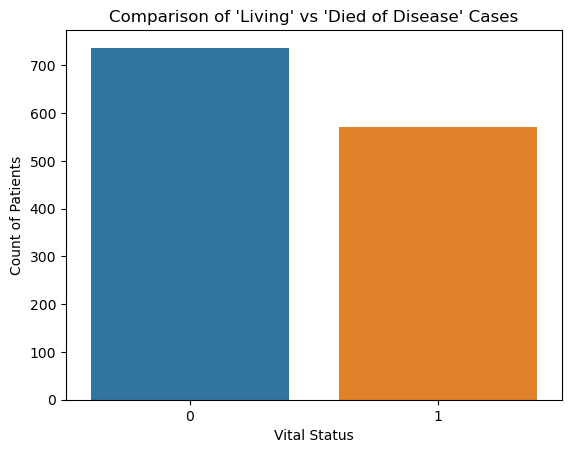

In [ ]:
# Create Bar graph to visualize the distribution of "Living" and "Died of Disease" cases in 'VITAL_STATUS'
sns.countplot(x='VITAL_STATUS', data=breast_cancer_df)
plt.xlabel('Vital Status')
plt.ylabel('Count of Patients')
plt.title("Comparison of 'Living' vs 'Died of Disease' Cases")
plt.show()

***Insight: Class Imbalance***

The bar graph illustrates a clear class imbalance within our dataset: the 'Living' category, denoted by `vital_status = 0`, represents a larger proportion of our patients, indicating that the majority of individuals in our study are currently alive. This disproportionate representation underscores the greater prevalence of living patients compared to those who have unfortunately succumbed to the disease, reflected by `vital_status = 1`.

Dealing with class imbalance is crucial data science, especially in medical datasets where the outcome variable is critical. Then, we will apply the Synthetic Minority Over-sampling Technique (SMOTE) to handle this problem in our Data Analysis section.

**3) Choosing the model and metrics**

In our study, we have employed Logistic Regression models to evaluate our hypotheses.

In our medical predictive project, the emphasis is placed predominantly on recall due to its critical role in identifying all true positive cases. The stakes of missing a true case of mortality (a false negative) are particularly high in medical scenarios, as it could lead to missed opportunities for life-saving interventions. Hence, we prioritize recall to capture as many true positives as possible, minimizing the risk of overlooking patients in critical conditions. However, accuracy and precision remain important metrics for overall model performance, since the primary goal is to ensure the health and safety of patients by detecting every potential adverse outcome.

**4) Splitting into Train/Test Sets**

Before we ran our logistic regression model, we randomly used 70% of the dataset as the training set, and the remaining 30% as our test set to evaluate how well a model trained on one subset of the data generalizes to new, unseen data.

In [3]:
# Split the data into training and testing sets
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**5) Resolve Class Imbalance**

As mentioned in the Data Cleaning section, we face the class imbalance within the Y variable, in which the number of patients who died from cancer (VITAL_STATUS = 1) is notably smaller than the number of patients who are still alive (VITAL_STATUS = 0). 

To address the imbalance in our dataset, particularly given our focus on the recall metric, we integrated the Synthetic Minority Over-sampling Technique (SMOTE) into the training phase of our models. SMOTE enhances model sensitivity towards the minority class by generating synthetic instances rather than duplicating existing ones. By doing so, we aim to improve the recall, ensuring that our model better identifies cases where the vital status is 'Died of Disease' (VITAL_STATUS = 1). It's crucial to note that we only employ SMOTE during model training to maintain the validity of our evaluation, which is performed on an unaltered, naturally imbalanced test set, mirroring real-world conditions.

In [4]:
# Apply SMOTE to generate synthetic samples and balance the classes
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: Fu

We then create the necessary input and output variables associated with the training and test sets (for each hypothesis), so that we can easily use them as we make our predictions and evaluate the performance of our models.

In [5]:
# Create an X training variable for Chemotherapy
X_c_train = X_train[["CHEMOTHERAPY"]]

# Create an X testing variable for Chemotherapy
X_c_test = x_test[["CHEMOTHERAPY"]]

# Create an X training variable for Lymph Nodes Examined Positive
X_ln_train = X_train[["LYMPH_NODES_EXAMINED_POSITIVE"]]

# Create an X testing variable for Lymph Nodes Examined Positive
X_ln_test = x_test[["LYMPH_NODES_EXAMINED_POSITIVE"]]

# The VITAL_STATUS training variable is already defined as Y_train
# The VITAL_STATUS testing variable is already defined as Y_test

### **A. HYPOTHESIS 1**

Null: A patient who has received chemotherapy has the same likelihood of death as a patient who has not received chemotherapy.
- β(chemotherapy) = 0

Alternative: A patient who has received chemotherapy has a different likelihood of death as a patient who has not received chemotherapy.
- β(chemotherapy) ≠ 0

**1. Fitting and evaluating the model**

For the first hypothesis, we run a logistic regression model on the training dataset with "CHEMOTHERAPY" as the input (independent variable) and "VITAL_STATUS" as the output (dependent variable). For each dataset, we assess the model performance with several evaluation metrics, namely accuracy score, a confusion matrix, and a classification report that includes precision, recall, and f1-score. 

We emphasize recall over accuracy to ensure minimal false negatives, which are particularly critical in medical settings. Our goal was to optimize the model for high sensitivity in detecting true positives, aiming for the most reliable predictions in life-or-death scenarios. 

In [6]:
# Initialize logistic regression model
model1 = LogisticRegression()

# Fit the model on the training data
model1.fit(X_c_train, Y_train)

# Find and print the coefficient and intercept of chemotherapy for the logistic regression
model1_coef = model1.coef_[0]
print("Chemotherapy Coefficient: " + str(model1_coef))

model1_intercept = model1.intercept_[0]
print("Chemotherapy Intercept: " + str(model1_intercept))

# Predict on the train data
m1_yhat_train = model1.predict(X_c_train)

# Predict on the test data
m1_yhat_test = model1.predict(X_c_test)

# Assess the model performance on the train set
m1_accuracy_train = metrics.accuracy_score(Y_train, m1_yhat_train)
m1_conf_matrix_train = metrics.confusion_matrix(Y_train, m1_yhat_train)
m1_classification_report_train = metrics.classification_report(Y_train, m1_yhat_train)

# Assess the model performance on the test set
m1_accuracy_test = metrics.accuracy_score(y_test, m1_yhat_test)
m1_conf_matrix_test = metrics.confusion_matrix(y_test, m1_yhat_test)
m1_classification_report_test = metrics.classification_report(y_test, m1_yhat_test)

# Output the model evaluation results for the train set
print(f"Accuracy for train set: {m1_accuracy_train}")
print("Confusion Matrix for train set:\n", m1_conf_matrix_train)
print("Classification Report for train set:\n", m1_classification_report_train)

# Output the model evaluation results for the test set
print(f"Accuracy for test set: {m1_accuracy_test}")
print("Confusion Matrix for test set:\n", m1_conf_matrix_test)
print("Classification Report for test set:\n", m1_classification_report_test)

/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: Fu

Chemotherapy Coefficient: [0.3076891]
Chemotherapy Intercept: -0.08250161041453004
Accuracy for train set: 0.5307539682539683
Confusion Matrix for train set:
 [[384 120]
 [353 151]]
Classification Report for train set:
               precision    recall  f1-score   support

           0       0.52      0.76      0.62       504
           1       0.56      0.30      0.39       504

    accuracy                           0.53      1008
   macro avg       0.54      0.53      0.50      1008
weighted avg       0.54      0.53      0.50      1008

Accuracy for test set: 0.5674300254452926
Confusion Matrix for test set:
 [[178  55]
 [115  45]]
Classification Report for test set:
               precision    recall  f1-score   support

           0       0.61      0.76      0.68       233
           1       0.45      0.28      0.35       160

    accuracy                           0.57       393
   macro avg       0.53      0.52      0.51       393
weighted avg       0.54      0.57      0.54    

/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: Fu

The positive coefficient (0.3076) for 'Chemotherapy' suggests that undergoing chemotherapy is positively associated with a patient dying of disease. When the input variable (chemotherapy) goes from x=0 to x=1 ('no chemotherapy' to 'chemotherapy'), we expect the odds of y (vital status = 1 or 'Died of Disease') to be multiplied by e^0.3076.

The logistic regression model's performance in predicting patient vital status based on chemotherapy treatment shows a relatively low accuracy of around 53% on the training set and 57% on the test set, indicating only a slight improvement over random guessing. The model demonstrates a conservative tendency, with a higher precision for the negative class (living patients) but a lower recall for the positive class (deceased patients), suggesting it's more likely to miss identifying at-risk patients. Additionally, the accuracy scores between the train and test set are comparable, which shows that the model is not overfitting. 

Given the critical nature of medical predictions, we believe that the low recall for the positive class is a significant concern, so we need further model improvements to enhance sensitivity to the positive cases.

**2. Thresholds adjustment and probability plot**

In [7]:
# Predict probabilities on the test set
probabilities_test1 = model1.predict_proba(X_c_test)[:, 1]

/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


To focus on recall (sensitivity), we want to adjust the decision threshold based on the predicted probabilities to increase the true positive rate at the expense of potentially more false positives.

In [8]:
#Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probabilities_test1)

#Find the threshold that maximizes recall
best_threshold_index = np.argmax(recall)
best_threshold = thresholds[best_threshold_index]
best_precision = precision[best_threshold_index]
best_recall = recall[best_threshold_index]

/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: Fu

Then, we create a plotting recall on the x-axis and precision on the y-axis at different threshold settings. This curve identifies the threshold that gives the best balance between recall and precision.

Precision indicates the quality of the model's predictions. When precision is high, the number of false positives (incorrectly predicted as died) is low.
Recall reflects the model's ability to identify all relevant cases. A high recall value means a low number of false negatives (missed patients who have died).

The red dot represents the selected threshold that maximizes recall without sacrificing precision too much. By looking at the plot, the most optimal threshold is 0.48 

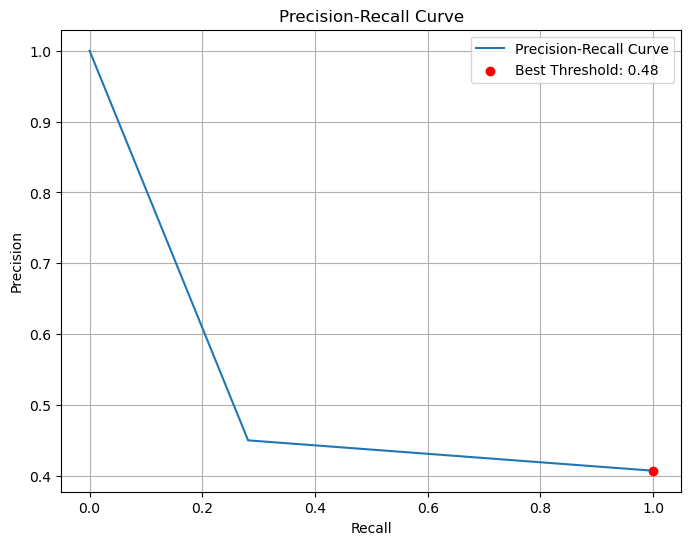

In [9]:
# Create a plot for the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.scatter(best_recall, best_precision, color='red', label=f'Best Threshold: {best_threshold:.2f}', zorder=5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Then, we apply the best threshold to re classify the probabilities as our binary outcomes

In [10]:
#Apply the selected threshold to re-classify probabilities as binary outcomes
m1_yhat_test_adjusted = (probabilities_test1 >= best_threshold).astype(int)

#Re-calculate metrics after threshold adjustment
m1_conf_matrix_test_adjusted = metrics.confusion_matrix(y_test, m1_yhat_test_adjusted)
m1_classification_report_test_adjusted = metrics.classification_report(y_test, m1_yhat_test_adjusted)

# Output the model evaluation results for the Chemotherapy test set
print(f"Best threshold for maximizing recall: {best_threshold}")
print("Confusion Matrix for test set:\n", m1_conf_matrix_test)
print("Classification Report for test set:\n", m1_classification_report_test)

Best threshold for maximizing recall: 0.4793862883662111
Confusion Matrix for test set:
 [[178  55]
 [115  45]]
Classification Report for test set:
               precision    recall  f1-score   support

           0       0.61      0.76      0.68       233
           1       0.45      0.28      0.35       160

    accuracy                           0.57       393
   macro avg       0.53      0.52      0.51       393
weighted avg       0.54      0.57      0.54       393



/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: Fu

After threshold adjustment, the model shows a higher recall for predicting living patients (0.76) than deceased ones (0.28), indicating a persistent challenge in correctly identifying all positive cases, which suggests that further model optimization or alternative approaches may be necessary to improve the identification of deceased patients, or the class imbalance may be a confounding factor in our analysis.

To visualize our logistic regression and understand the probability of death with vs without chemotherapy, we plotted a scatter plot. 

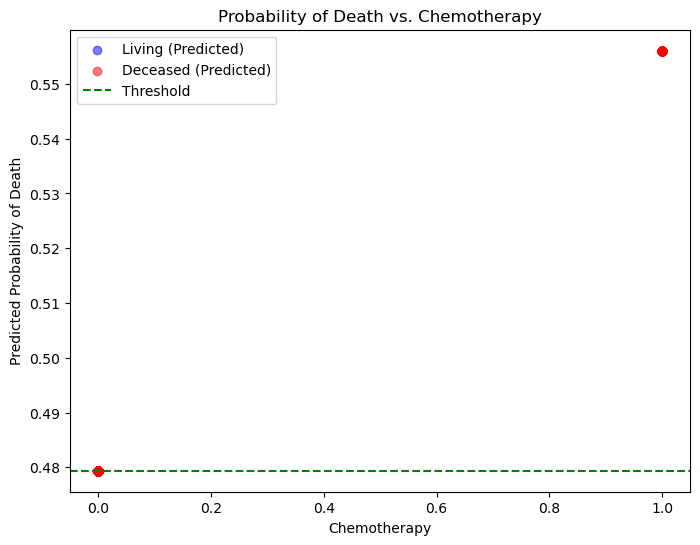

In [11]:
# Create a scatter plot to visualize the logistic regression probabilities
plt.figure(figsize=(8, 6))
# Plot the probabilities where the prediction is 0 or 1 (below threshold)
plt.scatter(X_c_test[m1_yhat_test_adjusted == 0], probabilities_test1[m1_yhat_test_adjusted == 0], color='blue', label='Living (Predicted)', alpha=0.5)
plt.scatter(X_c_test[m1_yhat_test_adjusted == 1], probabilities_test1[m1_yhat_test_adjusted == 1], color='red', label='Deceased (Predicted)', alpha=0.5)
# Add a horizontal line at the best threshold
plt.axhline(y=best_threshold, color='green', linestyle='--', label='Threshold')
# Add labels and title
plt.xlabel('Chemotherapy')
plt.ylabel('Predicted Probability of Death')
plt.title('Probability of Death vs. Chemotherapy')
plt.legend()
plt.show()

Given the binary nature of both our input and output, it appears that when patients do not have chemotherapy, there is around a 48% probability of death, and when they have chemotherapy, there is surprisingly a higher probability of death around 56%. 

The model indicates that undergoing chemotherapy is associated with an increased probability of death, as reflected by the positive coefficient for the chemotherapy variable. This could point towards the severity of the cases requiring chemotherapy, as such treatment is often given to more severe or advanced cases of illness (patients who are in later stages of disease and thus more likely to receive chemotherapy have inherently higher risks of mortality). 

**3. Z-Test for significance**

To assess the reliability of the coefficient, we took a look at its statistical significance. If the p-value associated with 'CHEMOTHERAPY' is less than our chosen significance level of 0.05, we can reject the null hypothesis that the coefficient is equal to zero. This suggests that the relationship between 'CHEMOTHERAPY' and 'VITAL_STATUS' is statistically significant. 

In [12]:
# Add a constant term to the independent variable for the intercept
X_c_with_intercept = sm.add_constant(X_c_train)

# Fit logistic regression model using statsmodels
logit_model1 = sm.Logit(Y_train, X_c_with_intercept)
result1 = logit_model1.fit()

# Get the summary of the regression
summary1 = result1.summary()
print(summary1)

# Extract p-value for CHEMOTHERAPY
p_value1 = result1.pvalues['CHEMOTHERAPY']

# Output the p-value
print(f"P-value for CHEMOTHERAPY: {p_value1}")

Optimization terminated successfully.
         Current function value: 0.690737
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           VITAL_STATUS   No. Observations:                 1008
Model:                          Logit   Df Residuals:                     1006
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                0.003477
Time:                        21:56:53   Log-Likelihood:                -696.26
converged:                       True   LL-Null:                       -698.69
Covariance Type:            nonrobust   LLR p-value:                   0.02751
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0842      0.074     -1.142      0.254      -0.229       0.060
CHEMOTHERAPY     0.3140

**4. Analysis/ Evaluation of Significance:**

The result shows that the two tailed p-value for CHEMOTHERAPY: 0.0279 which is lower than 0.05 signìicant level. Thus, we reject the null hypothesis, indicating that a patient who has had chemotherapy has a different likelihood of death than a patient who has not had chemotherapy.

A Pseudo R-squared of 0.003477 means that the model explains a very small proportion of the variance in the outcome, suggesting other variables might also be more important in predicting the vital status.

### **Hypothesis 1 Follow-up Test**

After concluding that there is sufficient evidence supporting that patient who had chemotherapy has a different likelihood of death than a patient who has not had chemotherapy, we want to conduct the following multivariable test to determine whether breast cancer patients undergoing both hormone therapy and chemotherapy have a different chance of 'Died of Disease' VITAL_STATUS compared to those undergoing only chemotherapy. Our approach is to find the p-value of combined variables, determine if this value is statistically significant (p-value < 0.05), then we will compare the coefficients of CHEMOTHERAPY and CHEMOTHERAPY*HORMONE_THERAPY.

**1. Hypothesis 1 Follow-up Preregistration**

Null Hypothesis: Breast cancer patients undergoing both hormone therapy and chemotherapy do not have a statistically different chance of 'Died of Disease'.

- β(CHEMOTHERAPY * HORMONE_THERAPY) = 0

Alternative Hypothesis: Breast cancer patients undergoing both hormone therapy and chemotherapy have a statistically different chance of 'Died of Disease' vital status

- β(CHEMOTHERAPY * HORMONE_THERAPY) ≠ 0


**2. Multicollinearity check**

First, we want to check whether there is multicolinearity between Chemotherapy and Hormone Therapy.

In [13]:
# Create a new dataframe 
chemo_hormone_df = X_train[["CHEMOTHERAPY", "HORMONE_THERAPY"]]
# Display the correlation matrix
correlation = chemo_hormone_df.corr()
print(correlation)

                 CHEMOTHERAPY  HORMONE_THERAPY
CHEMOTHERAPY         1.000000        -0.247463
HORMONE_THERAPY     -0.247463         1.000000


The correlation coefficient between "CHEMOTHERAPY" and "HORMONE_THERAPY" is approximately -0.247, which is quite low. This suggests that there is no strong multicollinearity between these two variables.

**3. Fitting and evaluating the model**

For this follow up test, we run a logistic regression model on the training dataset with "CHEMOTHERAPY*HORMONE_THERAPY" as the input (independent variable) and "VITAL_STATUS" as the output (dependent variable). We then use this model to predict "VITAL_STATUS" for both the training set and test set. For each dataset, we assess the model performance with several evaluation metrics, namely accuracy score, a confusion matrix, and a classification report that includes precision, recall, and f1-score.

In [14]:
# Create a new variable as the product of "CHEMOTHERAPY" and "HORMONE_THERAPY"
X_combined_train = X_train['CHEMOTHERAPY'] * X_train['HORMONE_THERAPY']
X_combined_test = x_test['CHEMOTHERAPY'] * x_test['HORMONE_THERAPY']

# Reshape the data as it needs to be a 2D array for LogisticRegression
X_combined_train = X_combined_train.values.reshape(-1, 1)
X_combined_test = X_combined_test.values.reshape(-1, 1)

# Initialize and fit the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_combined_train, Y_train)

# Find and print the coefficient and intercept of chemotherapy*hormone therapy for the logistic regression
logistic_model_coef = logistic_model.coef_[0]
print("Chemotherapy*Hormone Therapy Coefficient: " + str(logistic_model_coef))

logistic_model_intercept = logistic_model.intercept_[0]
print("Chemotherapy*Hormone Therapy Intercept: " + str(logistic_model_intercept))

# Predict "VITAL_STATUS" for both the training and test sets
y_train_pred = logistic_model.predict(X_combined_train)
y_test_pred = logistic_model.predict(X_combined_test)

# Evaluate the model's performance
train_accuracy = metrics.accuracy_score(Y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
class_report = metrics.classification_report(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Chemotherapy*Hormone Therapy Coefficient: [-0.34914969]
Chemotherapy*Hormone Therapy Intercept: 0.036109572376081714
Training Accuracy: 0.52
Test Accuracy: 0.42
Confusion Matrix:
[[ 25 208]
 [ 21 139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.11      0.18       233
           1       0.40      0.87      0.55       160

    accuracy                           0.42       393
   macro avg       0.47      0.49      0.36       393
weighted avg       0.49      0.42      0.33       393



/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: D

The negative coefficient for the interaction (Chemotherapy*Hormone Therapy) suggests that the combined treatment is associated with a decrease in the likelihood of 'Died of Disease' status compared to chemotherapy alone, which may indicate a potential beneficial effect of hormone therapy in conjunction with chemotherapy.

However, the low accuracy scores in both training (0.52) and test (0.42) datasets highlight that the model is not performing well overall. It also reports that while the model has a high recall for class 1 (patients who died of disease), it is at the expense of a very high false positive rate, which is problematic for clinical decision-making.

**4. Z-test for significance**

To assess the reliability of the coefficient, we took a look at its statistical significance. If the p-value associated with 'CHEMOTHERAPY' is less than our chosen significance level of 0.05, we can reject the null hypothesis that the coefficient is equal to zero. This suggests that the relationship between 'CHEMOTHERAPY*HORMONE_THERAPY' and 'VITAL_STATUS' is statistically significant. 

In [15]:
# Add a constant term to the independent variable for the intercept
X_combined_with_intercept = sm.add_constant(X_combined_train)

# Fit logistic regression model using statsmodels
logit_model = sm.Logit(Y_train, X_combined_with_intercept)
result = logit_model.fit()

# Get the summary of the regression
summary = result.summary()
print(summary)

# Extract p-value for the combined variable
p_value_combined = result.pvalues[1]  # 1 is the index of the combined variable in the result

# Output the p-value
print(f"P-value for combined variable (CHEMOTHERAPY * HORMONE_THERAPY): {p_value_combined}")

Optimization terminated successfully.
         Current function value: 0.691617
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           VITAL_STATUS   No. Observations:                 1008
Model:                          Logit   Df Residuals:                     1006
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                0.002207
Time:                        21:56:53   Log-Likelihood:                -697.15
converged:                       True   LL-Null:                       -698.69
Covariance Type:            nonrobust   LLR p-value:                   0.07904
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0377      0.067      0.566      0.572      -0.093       0.168
x1            -0.3643      0.

/var/folders/z1/9_4148kn37z1ynbt00dy9mfm0000gn/T/ipykernel_7920/1536437611.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_combined = result.pvalues[1]  # 1 is the index of the combined variable in the result


**5. Analysis/ Evaluation of Significance:**

p-value for combined variable (CHEMOTHERAPY * HORMONE_THERAPY) (0.0808) is greater than 0.05, suggesting that the combined variable "CHEMOTHERAPY * HORMONE_THERAPY" is not statistically significant in predicting the outcome "VITAL_STATUS." In other words, there is insufficient evidence to suggest that the product of "CHEMOTHERAPY" and "HORMONE_THERAPY" has a significant impact on vital status when considered together.

Besides, the pseudo R-squared is very low, which implies that the model explains only a small variance in the outcome, suggesting that other factors not included in the model may be influencing the vital status of the patients.

Based on these p-values, it appears that "CHEMOTHERAPY" alone is a statistically significant predictor of "VITAL_STATUS," while the interaction between "CHEMOTHERAPY" and "HORMONE_THERAPY" (represented by their product) does not seem to have a significant impact on vital status in the logistic regression model.

### **B. HYPOTHESIS 2**

Null: Patients with higher number of positive lymph nodes are less or equally likely to have died of disease.

- β(lymph_nodes) <= 0
  
Alternative: Patients with a higher number of positive lymph nodes are more likely to have died of disease.

- β(lymph_nodes) > 0

**1. Fitting and evaluating the model**

For the second hypothesis, we run a logistic regression model on the training dataset with "LYMPH_NODES_EXAMINED_POSITIVE" as the input (independent variable) and "VITAL_STATUS" as the output (dependent variable). We then use this model to predict "VITAL_STATUS" for both the training set and test set. For each dataset, we assess the model performance with several evaluation metrics, namely accuracy score, a confusion matrix, and a classification report that includes precision, recall, and f1-score.

In [16]:
# Initialize logistic regression model
model2 = LogisticRegression()

# Fit the model on the training data
model2.fit(X_ln_train, Y_train)

# Find and print the coefficient and intercept of positive lymph nodes for the logistic regression
model2_coef = model2.coef_[0]
print("Positive Lymph Nodes Coefficient: " + str(model2_coef))

model2_intercept = model2.intercept_[0]
print("Positive Lymph Nodes Intercept: " + str(model2_intercept))

# Predict on the train data
m2_yhat_train = model2.predict(X_ln_train)

# Predict on the test data
m2_yhat_test = model2.predict(X_ln_test)

# Assess the model performance on the train set
m2_accuracy_train = metrics.accuracy_score(Y_train, m2_yhat_train)
m2_conf_matrix_train = metrics.confusion_matrix(Y_train, m2_yhat_train)
m2_classification_report_train = metrics.classification_report(Y_train, m2_yhat_train)

# Assess the model performance on the test set
m2_accuracy_test = metrics.accuracy_score(y_test, m2_yhat_test)
m2_conf_matrix_test = metrics.confusion_matrix(y_test, m2_yhat_test)
m2_classification_report_test = metrics.classification_report(y_test, m2_yhat_test)

# Output the model evaluation results for the train set
print(f"Accuracy for train set: {m2_accuracy_train}")
print("Confusion Matrix for train set:\n", m2_conf_matrix_train)
print("Classification Report for train set:\n", m2_classification_report_train)

# Output the model evaluation results for the test set
print(f"Accuracy for test set: {m2_accuracy_test}")
print("Confusion Matrix for test set:\n", m2_conf_matrix_test)
print("Classification Report for test set:\n", m2_classification_report_test)

Positive Lymph Nodes Coefficient: [4.36235314]
Positive Lymph Nodes Intercept: -0.2031918953869877
Accuracy for train set: 0.6170634920634921
Confusion Matrix for train set:
 [[428  76]
 [310 194]]
Classification Report for train set:
               precision    recall  f1-score   support

           0       0.58      0.85      0.69       504
           1       0.72      0.38      0.50       504

    accuracy                           0.62      1008
   macro avg       0.65      0.62      0.60      1008
weighted avg       0.65      0.62      0.60      1008

Accuracy for test set: 0.6361323155216285
Confusion Matrix for test set:
 [[203  30]
 [113  47]]
Classification Report for test set:
               precision    recall  f1-score   support

           0       0.64      0.87      0.74       233
           1       0.61      0.29      0.40       160

    accuracy                           0.64       393
   macro avg       0.63      0.58      0.57       393
weighted avg       0.63      0.

/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: Fu

The coefficient for 'Positive Lymph Nodes' in the model is positive and notably large (4.362), indicating a strong association where an increase in the number of positive lymph nodes raises the model's predicted probability of a patient's 'Died of Disease' status. When the input variable (positive lymph nodes) increases by 1 unit, we expect the odds of y (vital status = 1 or 'Died of Disease') to be multiplied by e^4.362.

The accuracy, or percentage of data points that we predicted correctly, is 61.7% for the training set and 63.6% for the test set, which are higher than the probability if we were to randomly guess vital_status (50%). The accuracy for the two datasets are also comparable, suggesting that the model is not overfitting. 

The confusion matrix indicates that while the model has a high true positive rate for living patients at 0.85, it's significantly lower for deceased patients 0.38, reflecting an imbalance in the model's sensitivity to the two outcomes.

**2. Thresholds adjustment and probability plot**

In [17]:
# Predict probabilities on the test set
probabilities_test2 = model2.predict_proba(X_ln_test)[:, 1] 

/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


To focus on recall (sensitivity), we want to adjust the decision threshold based on the predicted probabilities to increase the true positive rate at the expense of potentially more false positives.

In [18]:
#Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probabilities_test2)

#Find the threshold that maximizes recall
best_threshold_index = np.argmax(recall)
best_threshold = thresholds[best_threshold_index]
best_precision = precision[best_threshold_index]
best_recall = recall[best_threshold_index]

/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: Fu

Then, we create a plotting recall on the x-axis and precision on the y-axis at different threshold settings. This curve identifies the threshold that gives the best balance between recall and precision.

Precision indicates the quality of the model's predictions. When precision is high, the number of false positives (incorrectly predicted as died) is low.
Recall reflects the model's ability to identify all relevant cases. A high recall value means a low number of false negatives (missed patients who have died).

The red dot represents the selected threshold that maximizes recall without sacrificing precision too much. By looking at the plot, the most optimal threshold is 0.45.

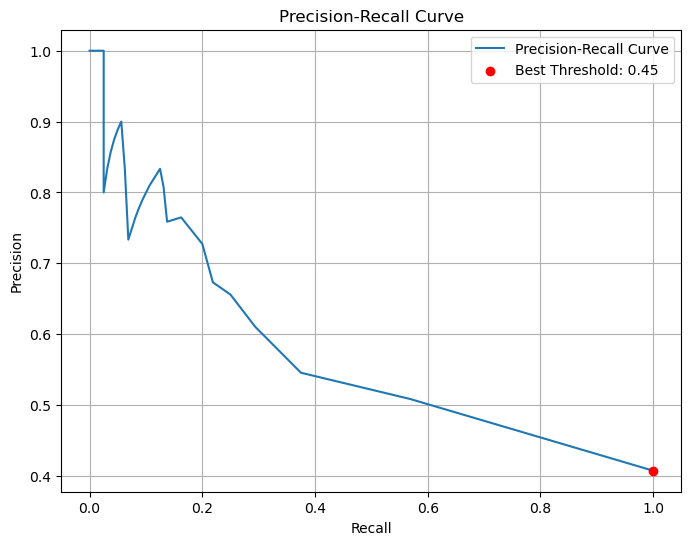

In [19]:
# Create a plot for the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.scatter(best_recall, best_precision, color='red', label=f'Best Threshold: {best_threshold:.2f}', zorder=5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Then, we apply the best threshold to re classify the probabilities with our binary outcomes.

In [20]:
#Apply the selected threshold to re-classify probabilities as binary outcomes
m2_yhat_test_adjusted = (probabilities_test2 >= best_threshold).astype(int)

#Re-calculate metrics after threshold adjustment
m2_conf_matrix_test_adjusted = metrics.confusion_matrix(y_test, m2_yhat_test_adjusted)
m2_classification_report_test_adjusted = metrics.classification_report(y_test, m2_yhat_test_adjusted)

# Output the model evaluation results for the Chemotherapy test set
print(f"Best threshold for maximizing recall: {best_threshold}")
print("Confusion Matrix for test set:\n", m2_conf_matrix_test)
print("Classification Report for test set:\n", m2_classification_report_test)

Best threshold for maximizing recall: 0.4493760820001956
Confusion Matrix for test set:
 [[203  30]
 [113  47]]
Classification Report for test set:
               precision    recall  f1-score   support

           0       0.64      0.87      0.74       233
           1       0.61      0.29      0.40       160

    accuracy                           0.64       393
   macro avg       0.63      0.58      0.57       393
weighted avg       0.63      0.64      0.60       393



/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/katherinegao888/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/utils/validation.py:767: Fu

Overall, the model's accuracy at this threshold is 0.64, reflecting a moderate predictive performance that could benefit from further tuning to better balance recall and precision. The chosen threshold for recall optimization markedly improved the model's ability to correctly predict living patients, with a recall of 0.87, but the recall for deceased patients remains low at 0.29, indicating potential missed critical cases. Despite a reasonable precision of over 0.60 for both classes, the low recall for deceased patients suggests that the model may not be sufficiently sensitive to all patient needs. 

To visualize our logistic regression and understand the probability of death with the number of positive lymph nodes, we plotted a scatter plot. 

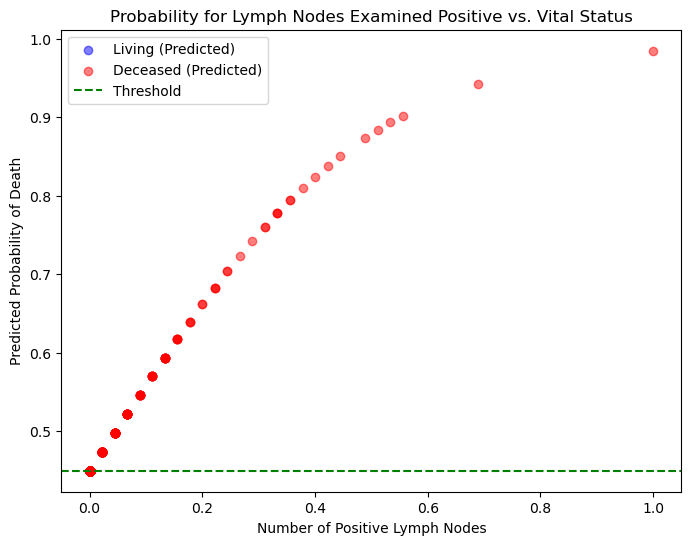

In [21]:
# Create a scatter plot to visualize the logistic regression probabilities
plt.figure(figsize=(8, 6))
# Plot the probabilities where the prediction is 0 or 1 (below threshold)
plt.scatter(X_ln_test[m2_yhat_test_adjusted == 0], probabilities_test2[m2_yhat_test_adjusted == 0], color='blue', label='Living (Predicted)', alpha=0.5)
plt.scatter(X_ln_test[m2_yhat_test_adjusted == 1], probabilities_test2[m2_yhat_test_adjusted == 1], color='red', label='Deceased (Predicted)', alpha=0.5)
# Add a horizontal line at the best threshold
plt.axhline(y=best_threshold, color='green', linestyle='--', label='Threshold')
# Add labels and title
plt.xlabel('Number of Positive Lymph Nodes')
plt.ylabel('Predicted Probability of Death')
plt.title('Probability for Lymph Nodes Examined Positive vs. Vital Status')
plt.legend()
plt.show()

We can see that as the number of positive lymph nodes increases, the predicted probability of death appears to increase at a slowing rate. This is consistent with the positive coefficient for positive lymph nodes from the model above. This visualization clearly supports the positive coefficient for lymph nodes found in the model, indicating a strong relationship between an increased number of positive lymph nodes and a higher probability of the 'Died of Disease' outcome.

**3. Z-test for significance**

To assess the reliability of the coefficient, we took a look at its statistical significance. If the p-value associated with 'LYMPH_NODES_EXAMINED_POSITIVE' is less than our chosen significance level of 0.05, we can reject the null hypothesis that the coefficient is equal to zero. This suggests that the relationship between 'LYMPH_NODES_EXAMINED_POSITIVE' and 'VITAL_STATUS' is statistically significant. 

In [22]:
# Add a constant term to the independent variable for the intercept
X_ln_with_intercept = sm.add_constant(X_ln_train)

# Fit logistic regression model using statsmodels
logit_model2 = sm.Logit(Y_train, X_ln_with_intercept)
result2 = logit_model2.fit()

# Get the summary of the regression
summary2 = result2.summary()
print(summary2)

# Extract p-value for LYMPH_NODES_EXAMINED_POSITIVE
p_value2 = result2.pvalues['LYMPH_NODES_EXAMINED_POSITIVE']

# Output the p-value
print(f"P-value for LYMPH_NODES_EXAMINED_POSITIVE: {p_value2}")

Optimization terminated successfully.
         Current function value: 0.651300
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           VITAL_STATUS   No. Observations:                 1008
Model:                          Logit   Df Residuals:                     1006
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                 0.06037
Time:                        21:56:54   Log-Likelihood:                -656.51
converged:                       True   LL-Null:                       -698.69
Covariance Type:            nonrobust   LLR p-value:                 4.114e-20
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.3699      0.077     -4.815      0.

**4. Analysis/ Evaluation of Significance:**

The result shows that the two tailed p-value for LYMPH_NODES_EXAMINED_POSITIVE: 3.774301568970492e-14 which is much lower than the alpha level of 0.05. Our one-tailed p-value is half of this value, which is even smaller. Thus, we reject the null hypothesis, meaning there is signficant evidence that a patient with a higher number of positive lymph nodes is more likely to have died of disease.

The large positive coefficient for 'LYMPH_NODES_EXAMINED_POSITIVE' suggests a strong relationship where each additional positive lymph node markedly increases the log-odds of a patient's likelihood of 'Died of Disease' status. 

### **Hypothesis 2 Follow-up Test**

Given the complexities involved in determining the relationship between number of lymph nodes and a patient's vital status, such as potential unconsidered confounding variables, we wanted to conduct t-test to see if we could confirm the same story of significance between the mean number of lymph nodes among the two patient groups - died and survived.

**1. Hypothesis 2 Follow-up Preregistration**

Null hypothesis: The population mean number of lymph nodes for patients who died is not significantly greater than patients who survivied.

- μ(died) ≤ μ(survived)

Alternative hypothesis: The population mean number of lymph nodes for patients who died is significantly greater than patients who survivied.

- μ(died) > μ(survived)


In [23]:
#recombine the X train set for lymph nodes analysis and the Y train set
combined_df = pd.concat([X_ln_train,Y_train], axis=1)

#create two separate dataframes - one which only consists of rows where patients lived and one which consts of rows where patients died
lymph_nodes_died = combined_df[combined_df['VITAL_STATUS'] == 1][['LYMPH_NODES_EXAMINED_POSITIVE']]
lymph_nodes_survived = combined_df[combined_df['VITAL_STATUS'] == 0][['LYMPH_NODES_EXAMINED_POSITIVE']]

#print the two dataframes
print(lymph_nodes_died)
print (lymph_nodes_survived)

#determine the t-stat and p-value of a ttest run on the two sample populations
t_statistic, p_value = ttest_ind(lymph_nodes_died, lymph_nodes_survived)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

      LYMPH_NODES_EXAMINED_POSITIVE
0                          0.066667
1                          0.000000
2                          0.000000
7                          0.088889
8                          0.044444
...                             ...
1003                       0.099234
1004                       0.082037
1005                       0.040019
1006                       0.000000
1007                       0.082874

[504 rows x 1 columns]
     LYMPH_NODES_EXAMINED_POSITIVE
3                         0.000000
4                         0.000000
5                         0.000000
6                         0.000000
9                         0.000000
..                             ...
905                       0.088889
908                       0.000000
909                       0.000000
910                       0.222222
911                       0.022222

[504 rows x 1 columns]
T-statistic: [8.80774165]
P-value: [5.49711019e-18]


**2. Analysis/ Evaluation of Significance:**

The result shows that for a one-sided right tailed test, the p-value is smaller than the 0.05 level of significance. Thus, we can reject the null hypothesis. In other words, we have sufficient evidence that the population mean number of lymph nodes for patients who died is significantly greater than patients who survived. This confirms a similar narrative as our original hypothesis 2, in which we found that there was significant evidence that a patient with a higher number of positive lymph nodes is more likely to have died of disease.

### ***Limitations of Metrics (for both Hypotheses)***

There are a few limitations to our metrics that need to be considered:

1. Imbalance between Precision and Recall, especially a lower recall for the 'Deceased' class. In a medical field, this is significant since it indicates a higher number of false negatives, which could mean missing out on identifying patients who require urgent medical care.

2. Threshold Selection: The choice of threshold has a profound impact on the precision-recall balance. The optimal threshold for a training dataset may not generalize well to new, unseen data, potentially leading to misclassification in practical applications.

3. This test assumes that our data follows a normal distribution. However, we do not have the appropriate information to assess whether the raw data collection was random or normal, especially since this is medical data with greater privacy regulations.

4. Pseudo R-squared values are relatively low for both models, indicating that they explain only a small proportion of the variance in the outcome variable. This suggests that other unaccounted factors may be influencing patient vital status, which the models have not captured.

5. There are potentially confounding variables that we might not have had enough domain knowledge to account for. For instance, in Hypothesis 1, there may be another treatment or medication that we did not test for that typically precedes, follows, or is conducted simultaneously with chemotherapy that is in fact, the main reason why vitality states are different among patients with/without chemotherapy.

6. Finally, it is important to note that we can only derive correlation from our results, but not causation. Such a conclusion could only be drawn from additional tests such as experimental design.

# __INTERPRETATION AND CONCLUSIONS__:

In an effort to answer our central research questions about predicting the vitality of breast cancer patients using clinical and biological data, we conducted a comprehensive study that utilized logistic regression models to sift through the data and identify the most impactful variables.

**Interpretation for Hypothesis 1:**

In our first hypothesis, we probed the impact of chemotherapy on patient survival. Our logistic regression model, which treated chemotherapy as the independent variable against the vital status, revealed a p-value of 0.0279, leading us to reject the null hypothesis and confirm that chemotherapy is indeed associated with a differing likelihood of mortality. 

Interestingly, our adjusted model demonstrated a higher recall for patients classified as living (0.76) versus those classified as deceased (0.28), underscoring the challenge in accurately predicting fatal outcomes. This suggests that patients undergoing chemotherapy, reflected by a higher predicted mortality rate of about 56% versus 48% for non-recipients, are potentially in more advanced stages of the disease, warranting chemotherapy. 

The positive coefficient of 0.3076 for chemotherapy on the 'DIED OF DISEASE' vital status aligns with this perspective, hinting at a correlation possibly driven by the severity of cases treated with chemotherapy rather than the treatment's efficacy itself. The model's Pseudo R-squared value of just 0.003477 indicates that other significant variables might be contributing to the vital status outcome, which our model has not captured, suggesting room for further exploration and model refinement.

**Interpretation for Hypothesis 2:**
The model shows that the number of positively examined lymph nodes (LYMPH_NODES_EXAMINED_POSITIVE) has a significant effect on the vital status of breast cancer patients. This is indicated by the very low p-value of approximately 3.774e-14, which is much less than the standard significance level of 0.05. Such a low p-value strongly suggests that the association observed is not due to random chance. 

Although the model's overall accuracy stands at about 62% for the training set and 64% for the test set, suggesting moderate predictive power, the recall for the deceased is notably low at 0.29, which could lead to missed detections of critically ill patients. 

The coefficient for LYMPH_NODES_EXAMINED_POSITIVE is 4.362, indicating that more positive lymph nodes are associated with a higher probability of 'Died of Disease' status. In practical terms, this means that as the number of positive lymph nodes increases, the likelihood of dying of disease increases significantly. This aligns with medical understanding, as a higher number of cancer-afflicted lymph nodes generally indicates more advanced disease and potentially poorer prognosis. 

**Conclusion:**
The variables examined in our research—chemotherapy and positive lymph node count—stood out as significant predictors of patient vitality. These results could be valuable for clinicians in assessing patient risk and further underline the importance of these factors in the management and treatment of breast cancer.

In conclusion, our study answers the call of our research questions affirmatively: yes, we can predict the vitality of a breast cancer patient using clinical and biological data, and yes, we have identified key variables that significantly impact patient vitality. This knowledge equips us to potentially contribute to the enhanced understanding and management of breast cancer, opening new chapters in the story of patient care.

# __LIMITATIONS__:

**DATA COLLECTION LIMITATIONS**

During the data collection phase of our research on breast cancer, we encountered several significant challenges.

1. Firstly, obtaining a suitable and reliable dataset in the healthcare domain posed a considerable hurdle. Given the sensitivity and privacy concerns surrounding patient health data, acquiring a public and credible dataset proved to be a complex task. To address this issue, we reached out to researchers and authors of published studies in renowned journals like PubMed, Nature, and Science. However, we faced delays in their responses as they too were cautious about the confidentiality and ethical considerations related to data obtained from hospitals.

2. Secondly, our dataset consisted of academic and clinical data, which added an extra layer of complexity, especially when the source of our dataset does not state the meaning of each variable. Therefore, we needed to collaborate closely with medical students and research carefully to ensure accurate interpretation, as clinical data often contains intricate and specialized terminology. Deciphering the clinical vocabulary and understanding the meaning of the variables within the dataset required substantial effort.

Despite these challenges, our commitment to obtaining high-quality breast cancer data for our research was unwavering, and these obstacles only strengthened our determination to contribute to this critical field of study.

**LIMITATIONS WITHIN THE DATASET** 

1. Missing Values: One of the most noticeable limitations is the prevalence of missing values in multiple columns (eg. VITAL_STATUS,LYMPH_NODES_EXAMINED_POSITIVE,..). This issue significantly impacts the dataset's completeness and poses challenges in performing accurate analyses and building reliable predictive models. It's not always clear why these values are missing; we believe that it could be due to patients missing scheduled checkups or other data collection challenges.

2. Class Imbalance: The disproportionate ratio of cases between the classes (e.g., more living patients than deceased) can cause the models to be biased towards predicting the majority class. This imbalance affects the model's ability to accurately predict the less represented class, which is often the class of greater clinical significance.

3. Mix of Numerical and Categorical Variables: Dealing with a combination of numerical and categorical variables within the dataset is a complex task. Encoding categorical variables and scaling numerical ones demands meticulous preprocessing

4. Selection Bias: Considering that the dataset primarily comprises clinical data, there's a risk of selection bias. The patients included in the dataset may not be representative of the broader population of breast cancer patients. Those who regularly visit the hospital and are included in the dataset may have different characteristics from those who do not, affecting the generalizability of findings.

5. Unrecorded Confounders: There may be unrecorded confounding variables that influence both the likelihood of receiving certain treatments and the vital status outcome, which could lead to spurious associations if not accounted for in the analysis.

# Data Sources

We chose a data table showing clinical data for 2,509 breast cancer patients, including Patient ID, Number of Postive Lymphnodes (numerical), Nottingham Prognostic Index (numerical), Cellularity/Tumor Content (categorical), Chemotherapy (binary), Cohort, ER Status measured by IHC (binary), HER2 Status measured by SNP6 (categorical), Hormone Therapy (binary), Inferred Menopausal State (binary), Sex (binary), Integrative Cluster (categorical/numerical), Age at Diagnosis (numerical), Overall Survival in Months since Initial Diagonosis (numerical), Overall Patient Survival Status (binary), Pam50 + Claudin-Low Subtype (categorical), 3-Gene Classifier Subtype (categorical), Patient's Vital Status (categorical), Primary Tumor Laterality (binary), Radio Therapy (binary), Tumor Other Histologic Subtype (categorical), Type of Breast Surgery (categorical), Relapse Free Status (binary), and Relapse Free Status in months (numerical).

Source for Patient Clinical Data: https://www.cbioportal.org/study/summary?id=brca_metabric

# Acknowledgments
**cBioPortal for Cancer Genomics:** for sourcing the breast cancer dataset that we used in our study

https://towardsdatascience.com/introduction-to-synthetic-minority-over-sampling-technique-and-its-implementation-from-scratch-77593647c10d
- We used this website to help us resolve the class imbalance between the possible outcomes of VITAL_STATUS using Synthetic Minority Over-sampling Technique.

# Appendix

https://github.com/sgs236/INFO2950-GroupProject

In our GitHub Repository "INFO 2950 Final Project - Phase 5" folder, please see...
- INFO 2950 Final Project - Data Cleaning.ipynb - for data cleaning description and original exploratory analysis
- breast_cancer_dependent.csv - for data set of all VITAL_STATUS variable
- breast_cancer_independent.csv - for data set of all potential input variables